# Praktikum 3

## Self-optimizing Map (SOM)

In [1]:
pip install minisom

  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10592 sha256=e9a7326f3c7905267b4684fccdd16deffee6dd298ac34ea6d56bab4c341663fb
  Stored in directory: c:\users\seli ruli amanda\appdata\local\pip\cache\wheels\7b\fd\40\c318df5c7fa3b276930ab30fed7306b603007e9b24d5479958
Successfully built minisom
Note: you may need to restart the kernel to use updated packages.


In [2]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Menggunakan data iris sebagai contoh

In [3]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

## Normalisasi dataset agar nilainya berada dalam rentang yang seragam.

In [4]:
# Normalisasi data
data = data / data.max(axis=0)

## Menentukan ukuran peta, misalkan (10x10) dan inisialisasi SOM

In [5]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

## Inisialisasi bobot SOM secara acak.

In [6]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

## Melatih SOM dengan data menggunakan metode train_random.

In [7]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

## Menggunakan peta hasil pelatihan untuk visualisasi. Dalam praktikum ini, akan menampilkan peta dengan warna dan menandai pemenang untuk setiap sampel.

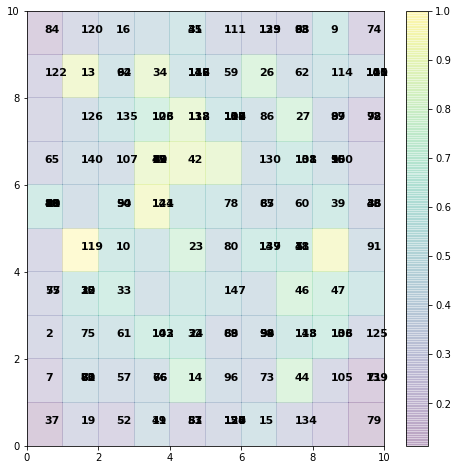

In [10]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='viridis', alpha=.2)
plt.colorbar()

plt.show()